In [1]:
from keras.datasets.mnist import load_data
import numpy as np
import sys
import matplotlib.pyplot as plt
import os 
import time

In [2]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
#np.seterr(divide='ignore', invalid='ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
#x_train = np.where(x_train != 0, 1, 0)
#x_test = np.where(x_test != 0, 1, 0)
x_train = x_train/255
x_test = x_test/255
x_test = x_test[:-2000]
y_test = y_test[:-2000]
x_vaild = x_test[-2000:]
y_vaild = y_test[-2000:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_vaild.shape, y_vaild.shape

((60000, 28, 28), (60000,), (8000, 28, 28), (8000,), (2000, 28, 28), (2000,))

In [4]:
for x in x_train[3]:
    for i in x:
        sys.stdout.write(f'{i:0.1f} ')
    sys.stdout.write('\n')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 1.0 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3 0.9 1.0 0.8 0.1 0.0 0.0 0.0 

In [5]:
def one_hot_encoding(x):
    tmp = np.zeros((len(x),max(x)+1))
    for idx, data in enumerate(x):
        tmp[idx,data] = 1
    return tmp

x_train = x_train.reshape(-1, 28*28)
y_train = one_hot_encoding(y_train)
x_test = x_test.reshape(-1, 28*28)
y_test = one_hot_encoding(y_test)
x_vaild = x_vaild.reshape(-1, 28*28)
y_vaild = one_hot_encoding(y_vaild)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_vaild.shape, y_vaild.shape

((60000, 784), (60000, 10), (8000, 784), (8000, 10), (2000, 784), (2000, 10))

# 경사하강법 (Gradient Descent)

In [72]:
W = np.random.randn(784,10)
b = np.zeros((1, 10))

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return sm

def cross_entropy(y_true, y_pred):
    return -(1/len(y_true)) * np.sum(np.sum(y_true*np.log(y_pred+1e-7), axis=1), axis=0)

def softmax_accuracy(y_true, y_pred):
    return (1/len(y_true)) * np.sum([np.argmax(y_pred[i]) == np.argmax(y_true[i]) for i in range(len(y_true))], axis=0)

epoch = 100
learning_rate = 0.001

m = len(x_train)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

begin = time.time()
for dataset_num in range(m):
    y_pred_train = softmax(np.dot(x_train, W)+b)
    train_loss = cross_entropy(y_train, y_pred_train)
    train_loss_hist.append(train_loss)
    train_acc = softmax_accuracy(y_train, y_pred_train)
    train_acc_hist.append(train_acc)

    y_pred_test = softmax(np.dot(x_test, W)+b)
    test_loss = cross_entropy(y_test, y_pred_test)
    test_loss_hist.append(test_loss)
    test_acc = softmax_accuracy(y_test, y_pred_test)
    test_acc_hist.append(test_acc)

    for i in range(1, epoch+1):
        x_train_one = x_train[dataset_num].reshape(1,-1)
        y_train_one = y_train[dataset_num].reshape(1,-1)

        y_pred_one = softmax(np.dot(x_train_one, W)+b)

        dW = np.dot(x_train_one.T, (y_pred_one-y_train_one))
        W = W - learning_rate * dW

        db = y_pred_one-y_train_one # 1개
        b = b - learning_rate * db
        
    if dataset_num % 6000 == 0:
        end = time.time()
        print(f'Dataset_num: {dataset_num:5}/{m}, train_loss: {train_loss.item():f}, test_loss: {test_loss.item():f}, train_acc: {train_acc.item():f}, test_acc: {test_acc.item():f} - {end-begin:f}s')
        begin = time.time()

Dataset_num:     0/60000, train_loss: 11.432804, test_loss: 11.255820, train_acc: 0.085517, test_acc: 0.090250 - 0.433110s
Dataset_num:  6000/60000, train_loss: 0.935742, test_loss: 0.955378, train_acc: 0.843033, test_acc: 0.839500 - 3225.816527s
Dataset_num: 12000/60000, train_loss: 0.796292, test_loss: 0.859567, train_acc: 0.863200, test_acc: 0.858375 - 2541.141933s
Dataset_num: 18000/60000, train_loss: 0.829599, test_loss: 0.833952, train_acc: 0.857967, test_acc: 0.856500 - 2451.443263s
Dataset_num: 24000/60000, train_loss: 0.674224, test_loss: 0.687833, train_acc: 0.882400, test_acc: 0.881750 - 2449.797019s
Dataset_num: 30000/60000, train_loss: 0.765613, test_loss: 0.798544, train_acc: 0.862233, test_acc: 0.856375 - 2450.414123s
Dataset_num: 36000/60000, train_loss: 0.744674, test_loss: 0.809228, train_acc: 0.869150, test_acc: 0.867750 - 2447.888469s
Dataset_num: 42000/60000, train_loss: 0.647921, test_loss: 0.713663, train_acc: 0.886517, test_acc: 0.875500 - 2448.578323s
Dataset_n

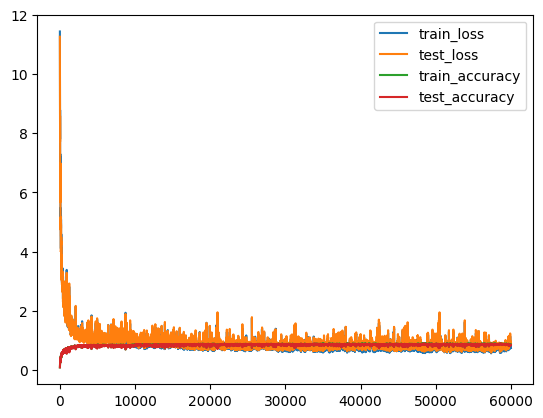

In [73]:
plt.plot(train_loss_hist, label='train_loss')
plt.plot(test_loss_hist, label='test_loss')
plt.plot(train_acc_hist, label='train_accuracy')
plt.plot(test_acc_hist, label='test_accuracy')
plt.legend()
plt.show()

In [74]:
y_pred_vaild = softmax(np.dot(x_vaild, W)+b)

softmax_accuracy(y_vaild, y_pred_vaild)

0.919

# 배치 경사하강법 (Batch Gradient Descent)

In [50]:
W = np.random.randn(784, 10)
b = np.zeros((1, 10))

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return sm

def cross_entropy(y_true, y_pred):
    return -(1/len(y_true)) * np.sum(np.sum(y_true*np.log(y_pred+1e-7), axis=1), axis=0)

def softmax_accuracy(y_true, y_pred):
    return (1/len(y_true)) * np.sum([np.argmax(y_pred[i]) == np.argmax(y_true[i]) for i in range(len(y_true))], axis=0)

epoch = 1000
learning_rate = 1

m = len(x_train)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

begin = time.time()
for i in range(1, epoch+1):
    y_pred_train = softmax(np.dot(x_train, W)+b)
    train_loss = cross_entropy(y_train, y_pred_train)
    train_loss_hist.append(train_loss)
    train_acc = softmax_accuracy(y_train, y_pred_train)
    train_acc_hist.append(train_acc)

    y_pred_test = softmax(np.dot(x_test, W)+b)
    test_loss = cross_entropy(y_test, y_pred_test)
    test_loss_hist.append(test_loss)
    test_acc = softmax_accuracy(y_test, y_pred_test)
    test_acc_hist.append(test_acc)

    dW = (1/m) * np.dot(x_train.T, (y_pred_train-y_train))
    W = W - learning_rate * dW

    db = (1/m) * np.sum(y_pred_train-y_train, axis=0)
    b = b - learning_rate * db

    if i % 100 == 0:
        end = time.time()
        print(f'Epoch: {i:5}/{epoch}, train_loss: {train_loss.item():f}, test_loss: {test_loss.item():f}, train_acc: {train_acc.item():f}, test_acc: {test_acc.item():f} - {end-begin:f}s')
        begin = time.time()

Epoch:   100/1000, train_loss: 0.923117, test_loss: 0.921957, train_acc: 0.802567, test_acc: 0.803375 - 46.913374s
Epoch:   200/1000, train_loss: 0.704662, test_loss: 0.720323, train_acc: 0.842050, test_acc: 0.836250 - 46.846256s
Epoch:   300/1000, train_loss: 0.610166, test_loss: 0.633337, train_acc: 0.859600, test_acc: 0.853000 - 46.912486s
Epoch:   400/1000, train_loss: 0.553753, test_loss: 0.581745, train_acc: 0.869917, test_acc: 0.862250 - 46.902714s
Epoch:   500/1000, train_loss: 0.514908, test_loss: 0.546485, train_acc: 0.876800, test_acc: 0.870500 - 47.349569s
Epoch:   600/1000, train_loss: 0.485950, test_loss: 0.520345, train_acc: 0.882050, test_acc: 0.874500 - 47.029025s
Epoch:   700/1000, train_loss: 0.463280, test_loss: 0.499990, train_acc: 0.886633, test_acc: 0.876750 - 46.962088s
Epoch:   800/1000, train_loss: 0.444914, test_loss: 0.483601, train_acc: 0.889250, test_acc: 0.880625 - 46.957205s
Epoch:   900/1000, train_loss: 0.429648, test_loss: 0.470074, train_acc: 0.89205

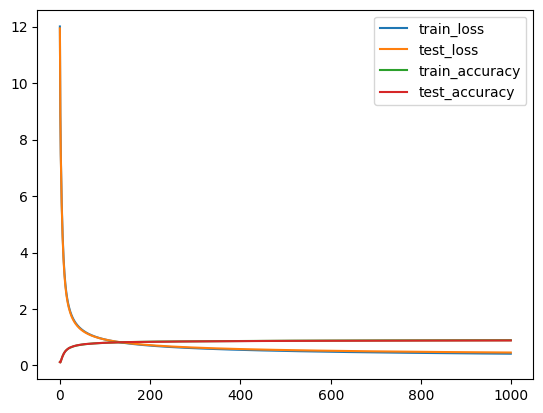

In [51]:
plt.plot(train_loss_hist, label='train_loss')
plt.plot(test_loss_hist, label='test_loss')
plt.plot(train_acc_hist, label='train_accuracy')
plt.plot(test_acc_hist, label='test_accuracy')
plt.legend()
plt.show()

In [52]:
y_pred_vaild = softmax(np.dot(x_vaild, W)+b)

softmax_accuracy(y_vaild, y_pred_vaild)

0.926

# 확률적 경사 하강법 (Stochastic Gradient Descent)

In [43]:
W = np.random.randn(784, 10)
b = np.zeros((1, 10))

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return sm

def cross_entropy(y_true, y_pred):
    return -(1/len(y_true)) * np.sum(np.sum(y_true*np.log(y_pred+1e-7), axis=1), axis=0)

def softmax_accuracy(y_true, y_pred):
    return (1/len(y_true)) * np.sum([np.argmax(y_pred[i]) == np.argmax(y_true[i]) for i in range(len(y_true))], axis=0)

epoch = 10
learning_rate = 0.01

m = len(x_train)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

begin = time.time()
for i in range(1, epoch+1):
    y_pred_train = softmax(np.dot(x_train, W)+b)
    train_loss = cross_entropy(y_train, y_pred_train)
    train_loss_hist.append(train_loss)
    train_acc = softmax_accuracy(y_train, y_pred_train)
    train_acc_hist.append(train_acc)

    y_pred_test = softmax(np.dot(x_test, W)+b)
    test_loss = cross_entropy(y_test, y_pred_test)
    test_loss_hist.append(test_loss)
    test_acc = softmax_accuracy(y_test, y_pred_test)
    test_acc_hist.append(test_acc)

    for dataset_num in range(m):
        x_train_one = x_train[dataset_num].reshape(1,-1)
        y_train_one = y_train[dataset_num].reshape(1,-1)

        y_pred_one = softmax(np.dot(x_train_one, W)+b)

        dW = np.dot(x_train_one.T, (y_pred_one-y_train_one))
        W = W - learning_rate * dW

        db = y_pred_one-y_train_one # 1개
        b = b - learning_rate * db

    if i % 1 == 0:
        end = time.time()
        print(f'Epoch: {i:5}/{epoch}, train_loss: {train_loss.item():f}, test_loss: {test_loss.item():f}, train_acc: {train_acc.item():f}, test_acc: {test_acc.item():f} - {end-begin:f}s')
        begin = time.time()

Epoch:     1/10, train_loss: 11.892624, test_loss: 11.827080, train_acc: 0.100000, test_acc: 0.097250 - 2.550608s
Epoch:     2/10, train_loss: 0.546333, test_loss: 0.582839, train_acc: 0.878467, test_acc: 0.870375 - 2.576611s
Epoch:     3/10, train_loss: 0.458456, test_loss: 0.503223, train_acc: 0.889667, test_acc: 0.881750 - 2.513732s
Epoch:     4/10, train_loss: 0.415813, test_loss: 0.465451, train_acc: 0.894850, test_acc: 0.887500 - 2.521977s
Epoch:     5/10, train_loss: 0.387245, test_loss: 0.440311, train_acc: 0.899083, test_acc: 0.891375 - 2.564163s
Epoch:     6/10, train_loss: 0.366902, test_loss: 0.422392, train_acc: 0.902333, test_acc: 0.894375 - 2.582321s
Epoch:     7/10, train_loss: 0.351918, test_loss: 0.409361, train_acc: 0.904483, test_acc: 0.894625 - 2.603649s
Epoch:     8/10, train_loss: 0.340397, test_loss: 0.399566, train_acc: 0.906400, test_acc: 0.896375 - 2.543095s
Epoch:     9/10, train_loss: 0.331217, test_loss: 0.391954, train_acc: 0.908250, test_acc: 0.898500 - 

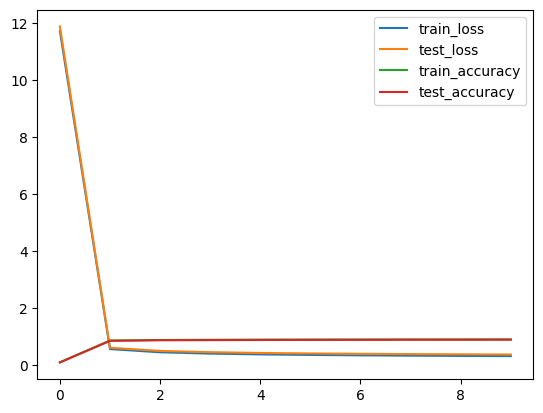

In [35]:
plt.plot(train_loss_hist, label='train_loss')
plt.plot(test_loss_hist, label='test_loss')
plt.plot(train_acc_hist, label='train_accuracy')
plt.plot(test_acc_hist, label='test_accuracy')
plt.legend()
plt.show()

In [36]:
y_pred_vaild = softmax(np.dot(x_vaild, W)+b)

softmax_accuracy(y_vaild, y_pred_vaild)

0.936

# 미니배치 경사 하강법(Minibatch Gradient Descent) (Stochastic)

In [47]:
W = np.random.randn(784, 10)
b = np.zeros((1, 10))

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1)).T
    return sm

def cross_entropy(y_true, y_pred):
    return -(1/len(y_true)) * np.sum(np.sum(y_true*np.log(y_pred+1e-7), axis=1), axis=0)

def softmax_accuracy(y_true, y_pred):
    return (1/len(y_true)) * np.sum([np.argmax(y_pred[i]) == np.argmax(y_true[i]) for i in range(len(y_true))], axis=0)

epoch = 10
learning_rate = 1
batch_size = 60

m = len(x_train)

train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

begin = time.time()
for i in range(1, epoch+1):
    y_pred_train = softmax(np.dot(x_train, W)+b)
    train_loss = cross_entropy(y_train, y_pred_train)
    train_loss_hist.append(train_loss)
    train_acc = softmax_accuracy(y_train, y_pred_train)
    train_acc_hist.append(train_acc)

    y_pred_test = softmax(np.dot(x_test, W)+b)
    test_loss = cross_entropy(y_test, y_pred_test)
    test_loss_hist.append(test_loss)
    test_acc = softmax_accuracy(y_test, y_pred_test)
    test_acc_hist.append(test_acc)

    for batch_size_i in range(m//batch_size):
        start_i = batch_size_i*batch_size
        end_i = batch_size_i*batch_size+batch_size

        x_train_batch = x_train[start_i:end_i,]
        y_train_batch = y_train[start_i:end_i,]

        y_pred_batch = softmax(np.dot(x_train_batch, W)+b)

        dW = (1/batch_size) * np.dot(x_train_batch.T, (y_pred_batch-y_train_batch))
        W = W - learning_rate * dW

        db = (1/batch_size) * np.sum(y_pred_batch-y_train_batch, axis=0)
        b = b - learning_rate * db

    if i % 1 == 0:
        end = time.time()
        print(f'Epoch: {i:5}/{epoch}, train_loss: {train_loss.item():f}, test_loss: {test_loss.item():f}, train_acc: {train_acc.item():f}, test_acc: {test_acc.item():f} - {end-begin:f}s')
        begin = time.time()

Epoch:     1/10, train_loss: 10.810025, test_loss: 10.601133, train_acc: 0.106850, test_acc: 0.115375 - 0.700655s
Epoch:     2/10, train_loss: 0.538789, test_loss: 0.588659, train_acc: 0.876733, test_acc: 0.868625 - 0.753722s
Epoch:     3/10, train_loss: 0.440619, test_loss: 0.498550, train_acc: 0.891567, test_acc: 0.882250 - 0.714241s
Epoch:     4/10, train_loss: 0.397992, test_loss: 0.462368, train_acc: 0.897933, test_acc: 0.888000 - 0.724729s
Epoch:     5/10, train_loss: 0.372863, test_loss: 0.441763, train_acc: 0.902133, test_acc: 0.891250 - 0.702890s
Epoch:     6/10, train_loss: 0.356163, test_loss: 0.428319, train_acc: 0.905050, test_acc: 0.892375 - 0.710200s
Epoch:     7/10, train_loss: 0.344401, test_loss: 0.419089, train_acc: 0.907133, test_acc: 0.892875 - 0.718067s
Epoch:     8/10, train_loss: 0.335771, test_loss: 0.412538, train_acc: 0.908200, test_acc: 0.893375 - 0.708516s
Epoch:     9/10, train_loss: 0.329152, test_loss: 0.407646, train_acc: 0.909600, test_acc: 0.893500 - 

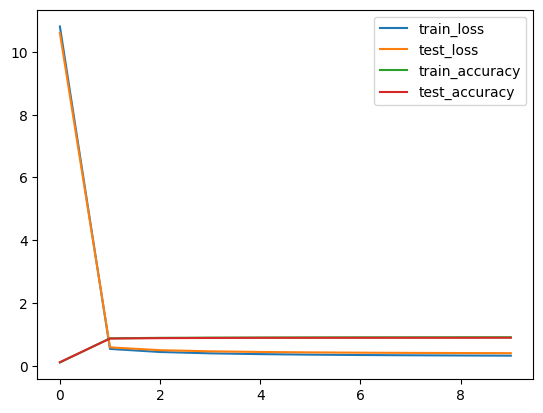

In [48]:
plt.plot(train_loss_hist, label='train_loss')
plt.plot(test_loss_hist, label='test_loss')
plt.plot(train_acc_hist, label='train_accuracy')
plt.plot(test_acc_hist, label='test_accuracy')
plt.legend()
plt.show()

In [49]:
y_pred_vaild = softmax(np.dot(x_vaild, W)+b)

softmax_accuracy(y_vaild, y_pred_vaild)

0.9375